In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('C://Users/naikp/Downloads/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
X = df.iloc[:,2:8].values

In [5]:
X

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

In [6]:
from sklearn.preprocessing import normalize
scaled_X = normalize(X)
scaled_X

array([[0.70833271, 0.53987376, 0.42274083, 0.01196489, 0.14950522,
        0.07480852],
       [0.44219826, 0.61470384, 0.59953989, 0.11040858, 0.20634248,
        0.11128583],
       [0.39655169, 0.5497918 , 0.47963217, 0.15011913, 0.2194673 ,
        0.48961931],
       ...,
       [0.36446153, 0.38846468, 0.7585445 , 0.01096068, 0.37223685,
        0.04682745],
       [0.93773743, 0.1805304 , 0.20340427, 0.09459392, 0.01531   ,
        0.19365326],
       [0.67229603, 0.40960124, 0.60547651, 0.01567967, 0.11506466,
        0.01254374]])

# K Means

Text(0, 0.5, 'WCSS')

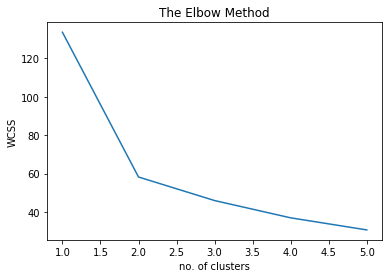

In [10]:
#Using the Elbow method to find the optimal no. of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,6):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,6), wcss)
plt.title('The Elbow Method')
plt.xlabel('no. of clusters')
plt.ylabel('WCSS')

In [11]:
#fitting k-means to the dataset
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(scaled_X)

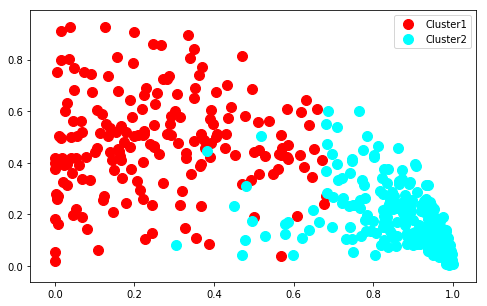

In [12]:
#visualising
plt.figure(figsize=(8,5))
plt.scatter(scaled_X[y_kmeans == 0, 0], scaled_X[y_kmeans == 0, 1], s=100, c='red', label='Cluster1')
plt.scatter(scaled_X[y_kmeans == 1, 0], scaled_X[y_kmeans == 1, 1], s=100, c='cyan', label='Cluster2')

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.legend()

# Agglomerative

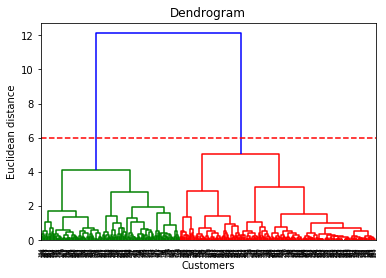

In [13]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(scaled_X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.axhline(y=6, color='red', linestyle='--')

In [14]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(scaled_X)

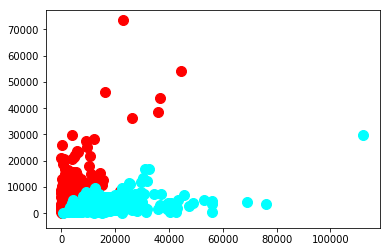

In [15]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='cyan', label='Cluster2')

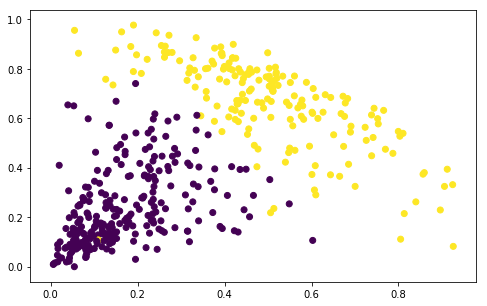

In [20]:
plt.figure(figsize=(8,5))
plt.scatter(scaled_X[:,1], scaled_X[:,2], c=hc.labels_)

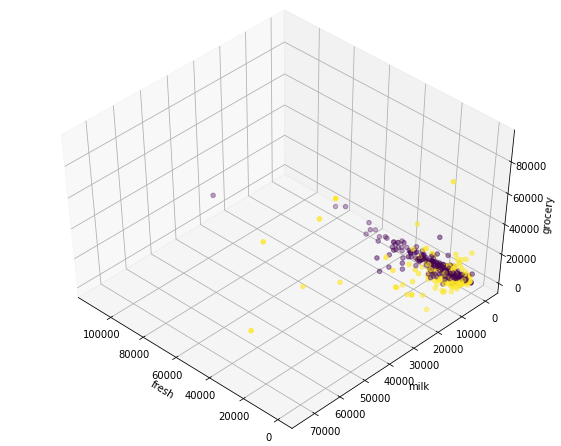

In [28]:
#on original data
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8,6))
plt.clf()
ax = Axes3D(fig, rect=[0,0,.95,1], elev=48, azim=134)
plt.cla()
ax.set_xlabel('fresh')
ax.set_ylabel('milk')
ax.set_zlabel('grocery')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y_hc.astype(np.float))

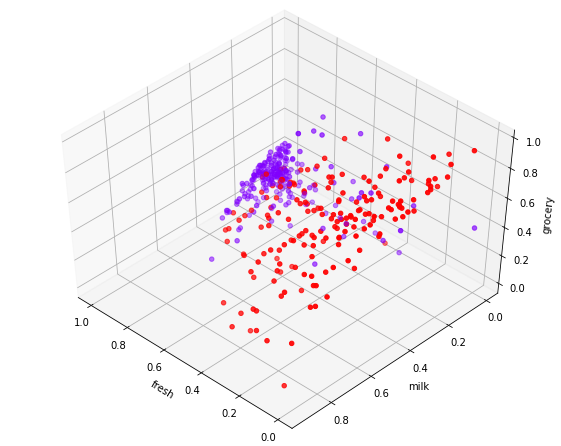

In [30]:
#on noramlized data
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8,6))
plt.clf()
ax = Axes3D(fig, rect=[0,0,.95,1], elev=48, azim=134)
plt.cla()
ax.set_xlabel('fresh')
ax.set_ylabel('milk')
ax.set_zlabel('grocery')
ax.scatter(scaled_X[:,0], scaled_X[:,1], scaled_X[:,2], c=y_hc.astype(np.float), cmap='rainbow')

# DBSCAN

In [23]:
from sklearn.cluster import DBSCAN
df2 = df[['Grocery', 'Milk']]
df2 = df2.astype('float32', copy=False).values
#df2

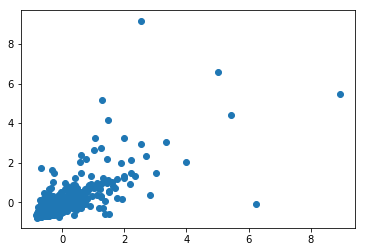

In [24]:
from sklearn.preprocessing import StandardScaler
normalized_df2 = StandardScaler().fit_transform(df2)
plt.scatter(normalized_df2[:,0], normalized_df2[:,1])

In [25]:
dbsc = DBSCAN(eps=.5, min_samples=15).fit(normalized_df2)

In [26]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[dbsc.core_sample_indices_]=True

Text(0.5, 1.0, 'DBSCAN on wholesale data')

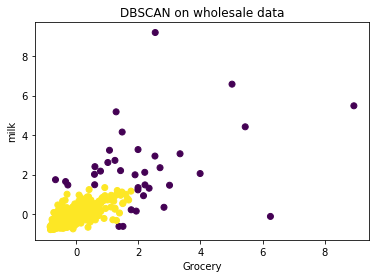

In [27]:
plt.scatter(normalized_df2[:,0], normalized_df2[:,1], c=labels)
plt.xlabel('Grocery')
plt.ylabel('milk')
plt.title('DBSCAN on wholesale data')